# **<span style="color:green">Comportamiento del precio del Bitcoin</span>**

**Por Jorge Monge**




**Bitcoin (₿)** es una criptomoneda inventada en 2008 por una persona desconocida o un grupo de personas que usa el nombre Satoshi Nakamoto. La moneda comenzó a usarse en 2009 cuando se lanzó su implementación como software de código abierto.

Bitcoin es una moneda *digital descentralizada*, sin un banco central ni un administrador único, que se puede enviar de un usuario a otro en la red bitcoin peer-to-peer sin necesidad de intermediarios. Los nodos de la red verifican las transacciones mediante criptografía y se registran en un libro mayor público distribuido llamado blockchain. Los bitcoins se crean como recompensa por un proceso conocido como minería. Pueden canjearse por otras monedas, productos y servicios.

El *30 de noviembre de 2020*, bitcoin alcanzó un nuevo máximo histórico de \$19,860 superando el máximo anterior de diciembre de 2017. El 19 de enero de 2021, Elon Musk colocó `#Bitcoin` en su perfil de Twitter tuiteando "En retrospectiva, era inevitable", lo que provocó un aunmento en el precio, para subir brevemente alrededor de $5,000 en una hora a \\$37,299.

**¿Como se comporta el precio del Bitcoin a través del tiempo? ¿como influyen los tweets relacionados?**

### Instalamos los paquetes requeridos

~~~
!pip install textblob
!pip install nltk
!pip install wordcloud
!pip install mplfinance
~~~

### **Importamos las librerias requeridas**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

symbol = 'BTCUSDT'
tick_interval = '1d'

# Exploración de los datos del precio del Bitcoin

### **Obtención de la información mediante una API**

Funcion de llamada a la **API** de **BINANCE**

In [2]:
def get_velas(start='', symbol='BTCUSDT', tick_interval='1d', limit=1000):
    
    base_url = 'https://api.binance.com/'
    ruta = 'api/v3/klines?'
    
    if start:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&startTime=' + str(start) +'&limit='+str(limit)
    else:
        query = 'symbol=' + symbol + '&interval=' + tick_interval +'&limit='+str(limit)
        
    velas = requests.get(base_url + ruta + query).json()
    
    return velas, velas[-1][6]  # return velas

```
symbol = 'BTCUSDT'
tick_interval = '1d'
```
La variable **symbol** indica de que par vamos a obtener los datos, en este ejemplo uso bitcoin contra tether dollar, pero se puede emplear cualquier otro par, como por ejemplo Ethereum/Tether (ETHUSDT).

La variable **tick_interval** permite indicar que velas vamos a obtener, en este caso se trata de las velas diarias. Cada vela corresponde a un día, que inicia y acaba según horario UTC, que es el horario empleado en los timestamps.

La *criptomoneda en la sombra*, el aceite que engrasa el sistema o stablecoinson algunas de las formas en las que se ha referido al tether, una divisa digital que, aunque menos conocida, es más usada que el bitcoin.

Esto es así porque tether ***—o USDT—*** es uno de los vehículos financieros que abren la puerta al extenso mundo de las criptodivisas.

La idea es **generar un bucle** desde el primer timestamp registrado en la API hasta el presente. El primer timestamp en milisegundos sería 1502942400000, que corresponde al *17 de agosto de 2017*.

In [3]:
def get_velas_todas(symbol, tick_interval):  # devuelve una lista de velas, cada vela es una lista
  # 17 de agosto de 2017
  inicio=1502942400000
  _, fin = get_velas(start='', symbol=symbol , tick_interval=tick_interval, limit=1)
  velas = []
  while inicio < fin:
      i_velas, sig = get_velas(inicio, symbol, tick_interval)
      velas = velas + i_velas
      inicio = sig
  return velas

Obtenemos la información de todas las velas desde la API

In [4]:
velas = get_velas_todas(symbol, tick_interval)

Convertimos la respuesta en un ***dataframe*** de pandas y renombramos las columnas

In [5]:
columns=['fecha_apertura','apertura', 'alta', 'baja','cierre','volumen','fecha_cierre','quote','trades','takers_buy_base','takers_buy_quote','ignore']
df = pd.DataFrame(velas, columns=columns)

Ordenamos la información por la `fecha de cierre`

In [6]:
df = df.sort_values('fecha_cierre')

Eliminamos los datos duplicados

In [7]:
df.drop_duplicates(keep='last').head()

,fecha_apertura,apertura,alta,baja,cierre,volumen,fecha_cierre,quote,trades,takers_buy_base,takers_buy_quote,ignore
0,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,9384.14140858
1,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,9184.08552906
2,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,10125.41408414
3,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,11706.76997007
4,1503360000000,4016.00000000,4104.82000000,3400.00000000,4040.00000000,966.68485800,1503446399999,3752505.77214051,6494,423.99518100,1637188.36934226,11773.27950025


In [8]:
df=df.drop(columns=['quote','trades','takers_buy_base','takers_buy_quote','ignore'])

**Convertimos** todos los valores del dataframe en tipo `float`

In [9]:
df[['apertura','alta','baja','cierre','volumen']] = df[['apertura','alta','baja','cierre','volumen']].astype(float)

In [10]:
df.head()

,fecha_apertura,apertura,alta,baja,cierre,volumen,fecha_cierre
0,1503014400000,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999
1,1503100800000,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999
2,1503187200000,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999
3,1503273600000,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999
4,1503360000000,4016.00,4104.82,3400.00,4040.00,966.684858,1503446399999


Al ser `cierre` nuestra columna mas importate para este analisis debemos limpiarla de `NANs`

In [11]:
df['cierre'].fillna(0)

0        4108.37
1        4139.98
2        4086.29
3        4016.00
4        4040.00
          ...   
1574    47545.59
1575    47140.54
1576    49389.99
1577    50053.90
1578    46466.80
Name: cierre, Length: 1579, dtype: float64

Convertir fechas UNIX a formato latino

In [12]:
btc = df.copy()

In [13]:
btc.head(1)

,fecha_apertura,apertura,alta,baja,cierre,volumen,fecha_cierre
0,1503014400000,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999


In [14]:
btc['fecha'] = pd.to_datetime(btc['fecha_cierre'], unit='ms')
#btc['fecha'] = btc['fecha'].dt.tz_localize('utc').dt.tz_convert('America/Mexico_City')
#btc.reset_index()
btc.head()

,fecha_apertura,apertura,alta,baja,cierre,volumen,fecha_cierre,fecha
0,1503014400000,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,2017-08-18 23:59:59.999
1,1503100800000,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,2017-08-19 23:59:59.999
2,1503187200000,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,2017-08-20 23:59:59.999
3,1503273600000,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2017-08-21 23:59:59.999
4,1503360000000,4016.00,4104.82,3400.00,4040.00,966.684858,1503446399999,2017-08-22 23:59:59.999


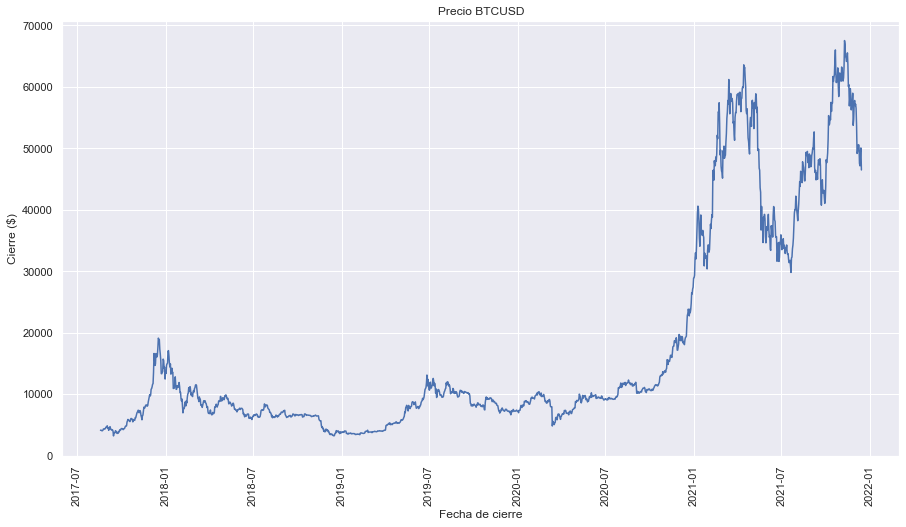

In [15]:
fig = plt.figure(figsize=(15, 8))
sns.set_theme()
ax = sns.lineplot(data=btc, x="fecha", y="cierre")
ax.set(title='Precio BTCUSD', xlabel='Fecha de cierre', ylabel='Cierre ($)')
ax.tick_params(axis='x', rotation=90);

In [16]:
btc.fecha = btc.fecha.apply(lambda x: x.strftime("%Y-%m-%d"))
btc.head()

,fecha_apertura,apertura,alta,baja,cierre,volumen,fecha_cierre,fecha
0,1503014400000,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,2017-08-18
1,1503100800000,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,2017-08-19
2,1503187200000,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,2017-08-20
3,1503273600000,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2017-08-21
4,1503360000000,4016.00,4104.82,3400.00,4040.00,966.684858,1503446399999,2017-08-22


Al final del proyecto se busca predecir el precio del **Bitcoin**

# Exploración de los tweets

In [17]:
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

Importamos el dataset tweets.csv

In [18]:
tw = pd.read_csv("tweets.csv")
tw.columns = ['fecha','hashtags','retweet','fuente','texto','usuario_fecha','usuario_desc','usuario_fav','usuario_seguidores','usuarios_amigos','usuario_loc','usuario_nombre','usuario_verificado'];
tw.head(3)

C:\Users\Jorge Monge\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fecha,hashtags,retweet,fuente,texto,usuario_fecha,usuario_desc,usuario_fav,usuario_seguidores,usuarios_amigos,usuario_loc,usuario_nombre,usuario_verificado
0,2021-02-11T05:59:04.000Z,"[""bitcoin""]",True,Twitter Web App,Blue Ridge Bank shares halted by NYSE after #b...,2009-04-27T01:05:09.000Z,"Biz Consultant, real estate, fintech, startups...",4838.0,8534.0,7605.0,"Atlanta, GA",DeSota Wilson,True
1,2021-02-11T05:58:48.000Z,"[""Thursday"",""Btc"",""wallet"",""security""]",True,Twitter for Android,"😎 Today, that's this #Thursday, we will do a ""...",2019-10-18T01:12:10.000Z,😎 BITCOINLIVE is a Dutch platform aimed at inf...,25483.0,6769.0,1532.0,NaN,CryptoND,True
2,2021-02-11T05:54:48.000Z,NaN,True,Twitter Web App,"Guys evening, I have read this article about B...",2014-11-10T16:50:37.000Z,"IM Academy : The best #forex, #SelfEducation, ...",924.0,128.0,332.0,"London, England",Tdlmatias,True


In [19]:
tw.shape

(594396, 13)

In [20]:
tw['fecha']=pd.to_datetime(tw['fecha'])

In [21]:
tw_texto = tw[['fecha','texto','usuario_seguidores','usuario_loc']]
tw_texto.head(5)

,fecha,texto,usuario_seguidores,usuario_loc
0,2021-02-11 05:59:04+00:00,Blue Ridge Bank shares halted by NYSE after #b...,8534.0,"Atlanta, GA"
1,2021-02-11 05:58:48+00:00,"😎 Today, that's this #Thursday, we will do a ""...",6769.0,NaN
2,2021-02-11 05:54:48+00:00,"Guys evening, I have read this article about B...",128.0,"London, England"
3,2021-02-11 05:54:33+00:00,$BTC A big chance in a billion! Price: \487264...,625.0,NaN
4,2021-02-11 05:54:06+00:00,This network is secured by 9 508 nodes as of t...,1249.0,Europa


In [22]:
#tw_texto = tw_texto[tw_texto['usuario_seguidores']>=1000]

In [23]:
tw_texto.shape

(594396, 4)

In [24]:
tw_texto['texto'] = tw_texto['texto'].str.lower();
tw_texto['texto'] = tw_texto['texto'].str.strip();
tw_texto['texto'] = tw_texto['texto'].str.replace('[^\w\s]', '');
tw_texto['texto'] = tw_texto['texto'].str.replace('\d', '');
tw_texto['texto'] = tw_texto['texto'].str.replace('\\n', '');
tw_texto['texto'] = tw_texto['texto'].fillna("");

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_15456/1931916615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_texto['texto'] = tw_texto['texto'].str.lower();
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_15456/1931916615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_texto['texto'] = tw_texto['texto'].str.strip();
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_15456/1931916615.py:3: FutureWarning: The default value of regex will change from True to Fa

In [25]:
tw_texto.head(5)

,fecha,texto,usuario_seguidores,usuario_loc
0,2021-02-11 05:59:04+00:00,blue ridge bank shares halted by nyse after bi...,8534.0,"Atlanta, GA"
1,2021-02-11 05:58:48+00:00,today thats this thursday we will do a take ...,6769.0,NaN
2,2021-02-11 05:54:48+00:00,guys evening i have read this article about bt...,128.0,"London, England"
3,2021-02-11 05:54:33+00:00,btc a big chance in a billion price bitcoin...,625.0,NaN
4,2021-02-11 05:54:06+00:00,this network is secured by nodes as of today...,1249.0,Europa


Obtenemos la polaridad de los tweets

In [26]:
polaridad = tw_texto['texto'].apply(lambda x: TextBlob(x).sentiment.polarity)
polaridad.name = 'polaridad'

In [27]:
#subjetividad = tw_texto['texto'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
#subjetividad.name = 'subjetividad'

In [28]:
#tw_texto = pd.concat([tw_texto, polaridad, subjetividad], axis=1)
tw_texto = pd.concat([tw_texto, polaridad], axis=1)

In [29]:
tw_texto.head(5)

,fecha,texto,usuario_seguidores,usuario_loc,polaridad
0,2021-02-11 05:59:04+00:00,blue ridge bank shares halted by nyse after bi...,8534.0,"Atlanta, GA",0.00
1,2021-02-11 05:58:48+00:00,today thats this thursday we will do a take ...,6769.0,NaN,0.00
2,2021-02-11 05:54:48+00:00,guys evening i have read this article about bt...,128.0,"London, England",0.00
3,2021-02-11 05:54:33+00:00,btc a big chance in a billion price bitcoin...,625.0,NaN,0.00
4,2021-02-11 05:54:06+00:00,this network is secured by nodes as of today...,1249.0,Europa,-0.25


In [30]:
tw_texto['fecha'] = pd.to_datetime(tw_texto['fecha'])

In [31]:
tw_texto.fecha = tw_texto.fecha.apply(lambda x: x.strftime("%Y-%m-%d"))

In [32]:
tw_texto.head(2)

,fecha,texto,usuario_seguidores,usuario_loc,polaridad
0,2021-02-11,blue ridge bank shares halted by nyse after bi...,8534.0,"Atlanta, GA",0.0
1,2021-02-11,today thats this thursday we will do a take ...,6769.0,NaN,0.0


In [33]:
btc_tw = btc.copy()
#btc_tw = btc_tw[(btc_tw['fecha']>="2021-02-05") & (btc_tw['fecha']<="2021-07-25")]
btc_tw = btc_tw[(btc_tw['fecha']>="2021-02-05") & (btc_tw['fecha']<="2021-11-29")]

In [34]:
btc_tw['positivo'] = 0
btc_tw['negativo'] = 0
btc_tw['neutral'] = 0
btc_tw['total'] = 0
btc_tw.head(5)

,fecha_apertura,apertura,alta,baja,cierre,volumen,fecha_cierre,fecha,positivo,negativo,neutral,total
1267,1612483200000,36936.65,38310.12,36570.00,38290.24,66681.334275,1612569599999,2021-02-05,0,0,0,0
1268,1612569600000,38289.32,40955.51,38215.94,39186.94,98757.311183,1612655999999,2021-02-06,0,0,0,0
1269,1612656000000,39181.01,39700.00,37351.00,38795.69,84363.679763,1612742399999,2021-02-07,0,0,0,0
1270,1612742400000,38795.69,46794.45,37988.89,46374.87,138597.536914,1612828799999,2021-02-08,0,0,0,0
1271,1612828800000,46374.86,48142.19,44961.09,46420.42,115499.861712,1612915199999,2021-02-09,0,0,0,0


In [35]:
for x in btc_tw.fecha:
    btc_tw.loc[btc_tw['fecha']==x,'positivo'] = tw_texto[(tw_texto['fecha']==x) & (tw_texto['polaridad']>0)]['polaridad'].count()
    btc_tw.loc[btc_tw['fecha']==x,'negativo'] = tw_texto[(tw_texto['fecha']==x) & (tw_texto['polaridad']<0)]['polaridad'].count()
    btc_tw.loc[btc_tw['fecha']==x,'neutral'] = tw_texto[(tw_texto['fecha']==x) & (tw_texto['polaridad']==0)]['polaridad'].count()

In [36]:
btc_tw['total'] = btc_tw['positivo']+btc_tw['negativo']+btc_tw['neutral']

In [37]:
btc_tw.head(5)

,fecha_apertura,apertura,alta,baja,cierre,volumen,fecha_cierre,fecha,positivo,negativo,neutral,total
1267,1612483200000,36936.65,38310.12,36570.00,38290.24,66681.334275,1612569599999,2021-02-05,386,99,521,1006
1268,1612569600000,38289.32,40955.51,38215.94,39186.94,98757.311183,1612655999999,2021-02-06,1153,300,1726,3179
1269,1612656000000,39181.01,39700.00,37351.00,38795.69,84363.679763,1612742399999,2021-02-07,1441,223,1448,3112
1270,1612742400000,38795.69,46794.45,37988.89,46374.87,138597.536914,1612828799999,2021-02-08,1928,415,2349,4692
1271,1612828800000,46374.86,48142.19,44961.09,46420.42,115499.861712,1612915199999,2021-02-09,1957,490,2687,5134


In [38]:
btc_tw.tail(5)

,fecha_apertura,apertura,alta,baja,cierre,volumen,fecha_cierre,fecha,positivo,negativo,neutral,total
1560,1637798400000,57138.29,59398.90,57000.00,58960.36,42153.51522,1637884799999,2021-11-25,0,0,0,0
1561,1637884800000,58960.37,59150.00,53500.00,53726.53,65927.87066,1637971199999,2021-11-26,0,0,0,0
1562,1637971200000,53723.72,55280.00,53610.00,54721.03,29716.99957,1638057599999,2021-11-27,0,0,0,0
1563,1638057600000,54716.47,57445.05,53256.64,57274.88,36163.71370,1638143999999,2021-11-28,0,0,0,0
1564,1638144000000,57274.89,58865.97,56666.67,57776.25,40125.28009,1638230399999,2021-11-29,0,0,0,0


In [39]:
btc_tw['fecha'] = pd.to_datetime(btc_tw['fecha'])

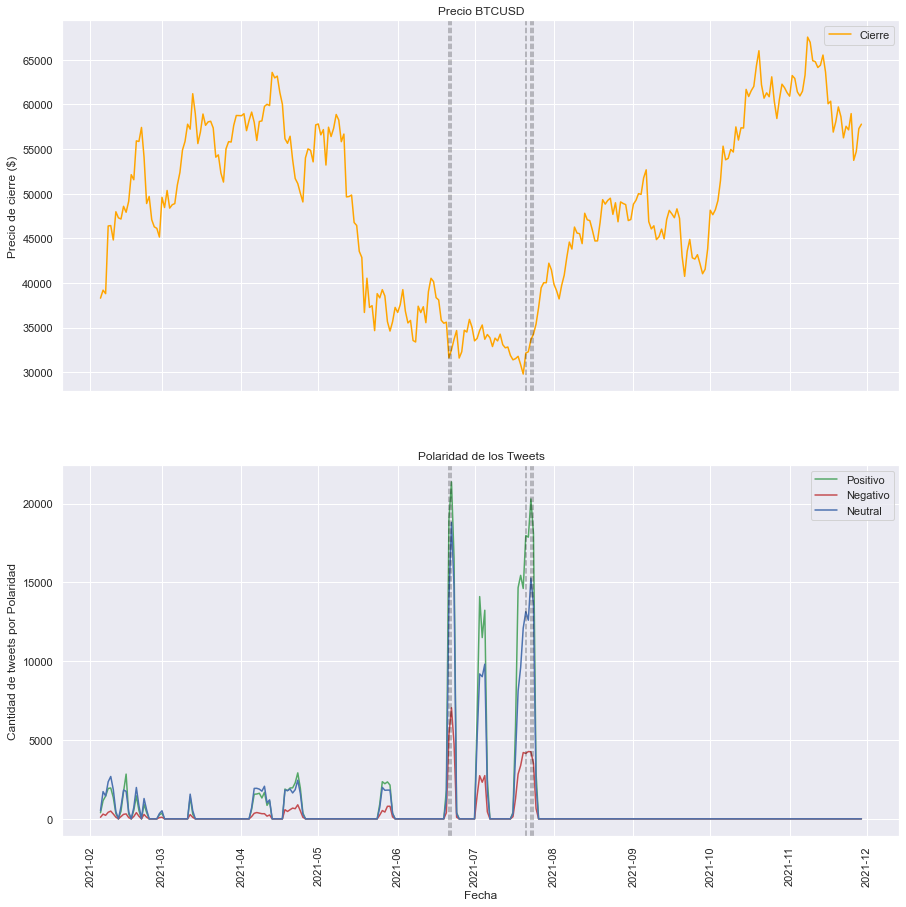

In [40]:
fig = plt.figure(figsize=(15, 15))
axes = fig.subplots(2, 1, sharex=True, sharey=False)

sns.lineplot(data=btc_tw, x="fecha", y="cierre", ax=axes[0], color='orange', label='Cierre')
sns.lineplot(data=btc_tw, x="fecha", y="positivo", ax=axes[1], color='g', label='Positivo')
sns.lineplot(data=btc_tw, x="fecha", y="negativo", ax=axes[1], color='r', label='Negativo')
sns.lineplot(data=btc_tw, x="fecha", y="neutral", ax=axes[1], color='b', label='Neutral')

x = axes[1].lines[0].get_xdata()
y = axes[1].lines[0].get_ydata()
top = np.argsort(y)[-5:][::-1]

axes[0].axvline(x[top[0]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[0]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[1]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[1]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[2]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[2]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[3]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[3]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[4]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[4]], color='black', linestyle='--', alpha=0.3)

axes[0].set(title='Precio BTCUSD', xlabel='Fecha', ylabel='Precio de cierre ($)')
axes[1].set(title='Polaridad de los Tweets', xlabel='Fecha', ylabel='Cantidad de tweets por Polaridad');
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(loc='upper right');

In [41]:
btc_tw_min = btc_tw[(btc_tw['fecha']>="2021-06-15") & (btc_tw['fecha']<="2021-08-01")]

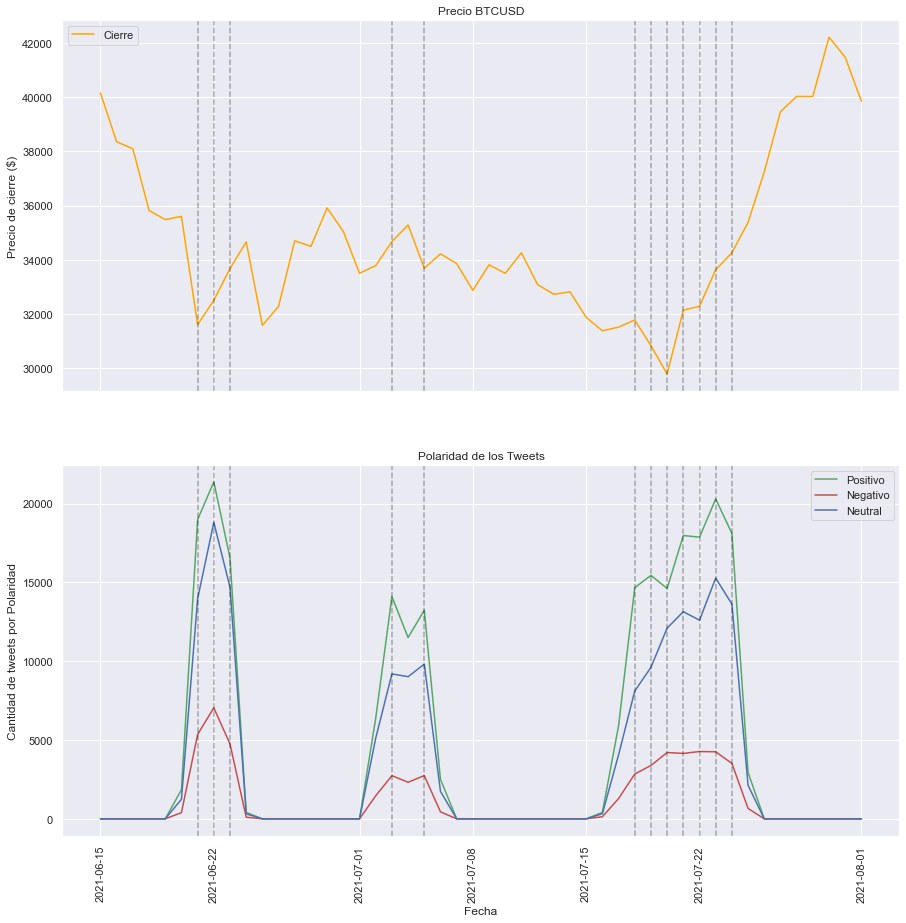

In [42]:
fig = plt.figure(figsize=(15, 15))
axes = fig.subplots(2, 1, sharex=True, sharey=False)

sns.lineplot(data=btc_tw_min, x="fecha", y="cierre", ax=axes[0], color='orange', label='Cierre')
sns.lineplot(data=btc_tw_min, x="fecha", y="positivo", ax=axes[1], color='g', label='Positivo')
sns.lineplot(data=btc_tw_min, x="fecha", y="negativo", ax=axes[1], color='r', label='Negativo')
sns.lineplot(data=btc_tw_min, x="fecha", y="neutral", ax=axes[1], color='b', label='Neutral')

x = axes[1].lines[0].get_xdata()
y = axes[1].lines[0].get_ydata()
top = np.argsort(y)[-12:][::-1]

axes[0].axvline(x[top[0]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[0]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[1]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[1]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[2]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[2]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[3]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[3]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[4]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[4]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[5]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[5]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[6]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[6]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[7]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[7]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[8]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[8]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[9]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[9]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[10]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[10]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[11]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[11]], color='black', linestyle='--', alpha=0.3)

axes[0].set(title='Precio BTCUSD', xlabel='Fecha', ylabel='Precio de cierre ($)')
axes[1].set(title='Polaridad de los Tweets', xlabel='Fecha', ylabel='Cantidad de tweets por Polaridad');
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(loc='upper right');

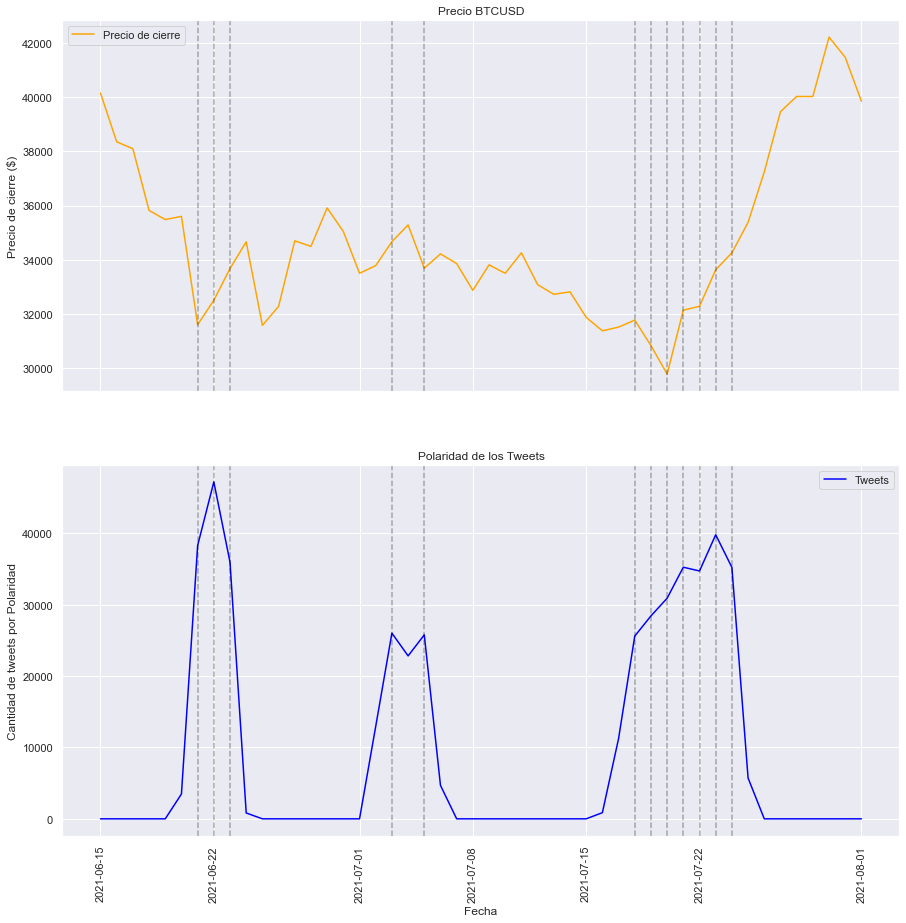

In [53]:
fig = plt.figure(figsize=(15, 15))
axes = fig.subplots(2, 1, sharex=True, sharey=False)

sns.lineplot(data=btc_tw_min, x="fecha", y="cierre", ax=axes[0], color='orange', label='Precio de cierre')
sns.lineplot(data=btc_tw_min, x="fecha", y="total", ax=axes[1], color='blue', label='Tweets')

x = axes[1].lines[0].get_xdata()
y = axes[1].lines[0].get_ydata()
top = np.argsort(y)[-12:][::-1]

axes[0].axvline(x[top[0]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[0]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[1]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[1]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[2]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[2]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[3]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[3]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[4]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[4]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[5]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[5]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[6]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[6]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[7]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[7]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[8]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[8]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[9]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[9]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[10]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[10]], color='black', linestyle='--', alpha=0.3)

axes[0].axvline(x[top[11]], color='black', linestyle='--', alpha=0.3)
axes[1].axvline(x[top[11]], color='black', linestyle='--', alpha=0.3)

axes[0].set(title='Precio BTCUSD', xlabel='Fecha', ylabel='Precio de cierre ($)')
axes[1].set(title='Polaridad de los Tweets', xlabel='Fecha', ylabel='Cantidad de tweets por Polaridad');
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(loc='upper right');

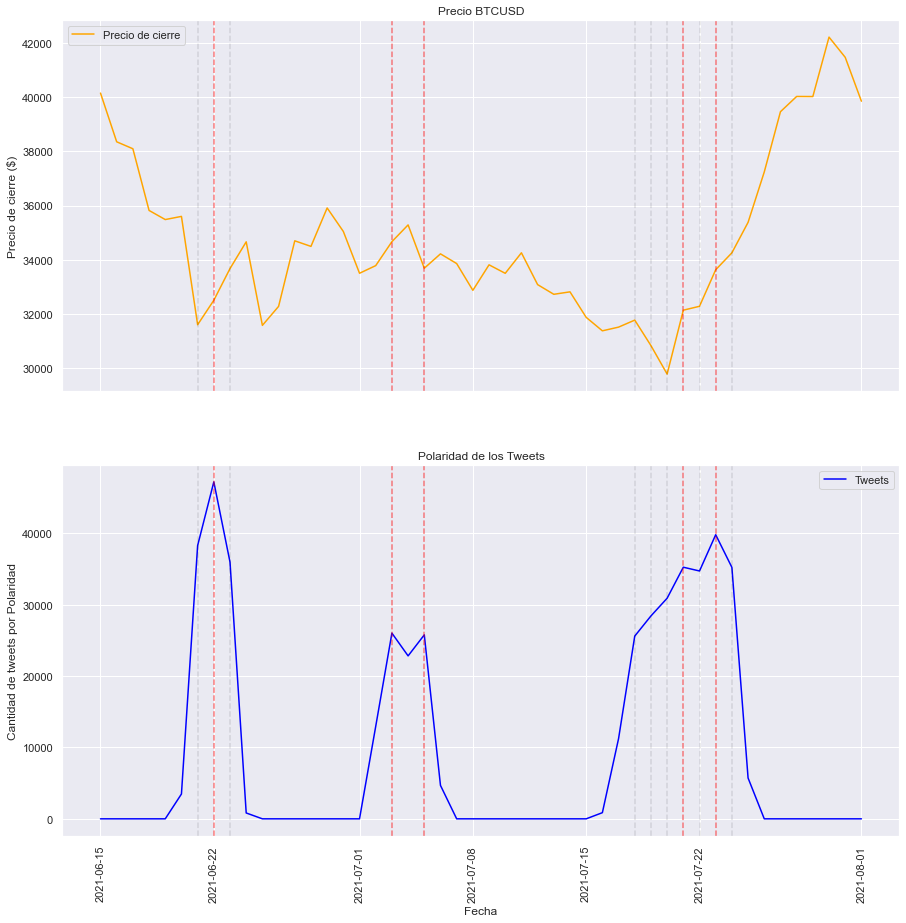

In [62]:
fig = plt.figure(figsize=(15, 15))
axes = fig.subplots(2, 1, sharex=True, sharey=False)

sns.lineplot(data=btc_tw_min, x="fecha", y="cierre", ax=axes[0], color='orange', label='Precio de cierre')
sns.lineplot(data=btc_tw_min, x="fecha", y="total", ax=axes[1], color='blue', label='Tweets')

x = axes[1].lines[0].get_xdata()
y = axes[1].lines[0].get_ydata()
top = np.argsort(y)[-12:][::-1]

axes[0].axvline(x[top[0]], color='red', linestyle='--', alpha=0.5)
axes[1].axvline(x[top[0]], color='red', linestyle='--', alpha=0.5)

axes[0].axvline(x[top[1]], color='red', linestyle='--', alpha=0.5)
axes[1].axvline(x[top[1]], color='red', linestyle='--', alpha=0.5)

axes[0].axvline(x[top[2]], color='black', linestyle='--', alpha=0.1)
axes[1].axvline(x[top[2]], color='black', linestyle='--', alpha=0.1)

axes[0].axvline(x[top[3]], color='black', linestyle='--', alpha=0.1)
axes[1].axvline(x[top[3]], color='black', linestyle='--', alpha=0.1)

axes[0].axvline(x[top[4]], color='red', linestyle='--', alpha=0.5)
axes[1].axvline(x[top[4]], color='red', linestyle='--', alpha=0.5)

axes[0].axvline(x[top[5]], color='black', linestyle='--', alpha=0.1)
axes[1].axvline(x[top[5]], color='black', linestyle='--', alpha=0.1)

axes[0].axvline(x[top[6]], color='black', linestyle='--', alpha=0.1)
axes[1].axvline(x[top[6]], color='black', linestyle='--', alpha=0.1)

axes[0].axvline(x[top[7]], color='black', linestyle='--', alpha=0.1)
axes[1].axvline(x[top[7]], color='black', linestyle='--', alpha=0.1)

axes[0].axvline(x[top[8]], color='black', linestyle='--', alpha=0.1)
axes[1].axvline(x[top[8]], color='black', linestyle='--', alpha=0.1)

axes[0].axvline(x[top[9]], color='red', linestyle='--', alpha=0.5)
axes[1].axvline(x[top[9]], color='red', linestyle='--', alpha=0.5)

axes[0].axvline(x[top[10]], color='red', linestyle='--', alpha=0.5)
axes[1].axvline(x[top[10]], color='red', linestyle='--', alpha=0.5)

axes[0].axvline(x[top[11]], color='black', linestyle='--', alpha=0.1)
axes[1].axvline(x[top[11]], color='black', linestyle='--', alpha=0.1)

axes[0].set(title='Precio BTCUSD', xlabel='Fecha', ylabel='Precio de cierre ($)')
axes[1].set(title='Polaridad de los Tweets', xlabel='Fecha', ylabel='Cantidad de tweets por Polaridad');
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(loc='upper right');

Correlación entre el precio de cierre y las polaridades

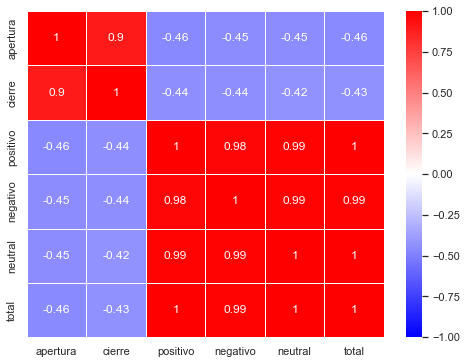

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(btc_tw_min[['apertura','cierre','positivo','negativo','neutral','total']].corr(), vmin=-1, vmax=1, annot=True, cmap="bwr", linewidths=.5);

<b>Conclusiones:</b>
en la tabla de correlaciones anterior nos dice que no hay relacion entre el precio de cierre y los tweets, pero en la grafica podemos ver que despues de los picos de la grafica de polaridad hay un crecimiento en el precio del bitcoin.

### Gráfica de velas

In [63]:
import mplfinance as mpf

In [64]:
btc_velas = btc_tw.copy()
btc_velas = btc_velas.drop(columns=['positivo','negativo','neutral','total'])
btc_velas.columns = ['fecha_apertura','open','high','low','close','volume','fecha_cierre','date']
btc_velas.index = btc_velas['date']

In [65]:
btc_velas.head(2)

,fecha_apertura,open,high,low,close,volume,fecha_cierre,date
date,,,,,,,,
2021-02-05,1612483200000,36936.65,38310.12,36570.00,38290.24,66681.334275,1612569599999,2021-02-05
2021-02-06,1612569600000,38289.32,40955.51,38215.94,39186.94,98757.311183,1612655999999,2021-02-06


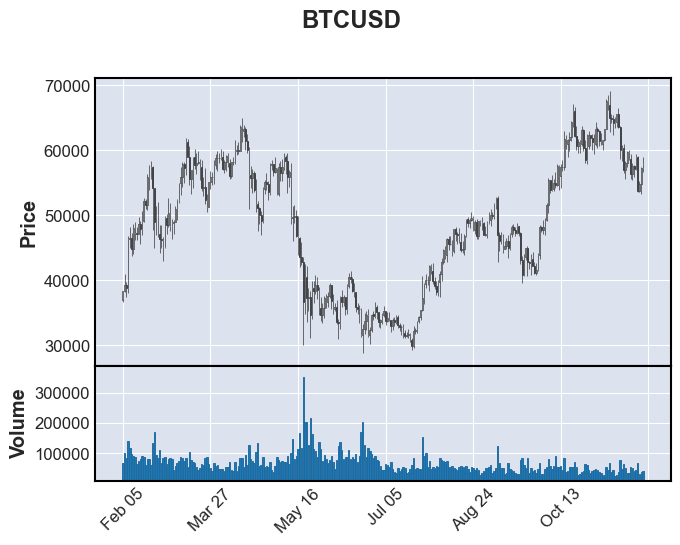

In [66]:
mpf.plot(btc_velas[(btc_velas['date']>="2021-02-05") & (btc_velas['date']<="2021-11-29")],type='candle',title='BTCUSD',volume=True)

### Análisis de ngramas

In [67]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Jorge
[nltk_data]     Monge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Jorge
[nltk_data]     Monge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
tw_texto_min = tw_texto.copy()

In [70]:
tw_texto_min = tw_texto_min[tw_texto_min['usuario_seguidores']>=100000]

In [71]:
tw_texto_min = tw_texto_min[(tw_texto_min['fecha']>="2021-06-15") & (tw_texto_min['fecha']<="2021-08-01")]

In [72]:
tw_texto_min.head()

,fecha,texto,usuario_seguidores,usuario_loc,polaridad
128436,2021-06-24,bitcoin and crypto exchange ftx is now a spons...,347102.0,Decentralised,0.0625
128626,2021-06-24,therealvsky guten tag you can read it here in...,477881.0,Wherever threads are written..,0.0000
128690,2021-06-24,bitcoin is beneficial to everybody but most of...,315910.0,Bitcoin,0.5000
128805,2021-06-24,stock market today jimcramer has a bit of impo...,786675.0,"New York, NY",0.2000
128825,2021-06-24,the reaction when bitcoin finally breaks below...,486343.0,Not Financial Advice.,0.0000


In [73]:
tokenizar = tw_texto_min['texto'].apply(nltk.word_tokenize)
palabras = tokenizar.sum()

In [74]:
en_stopwords = stopwords.words('english')
palabras_sin_stopwords = [palabra for palabra in palabras if palabra not in en_stopwords]

freq_dist = nltk.FreqDist(palabras_sin_stopwords)

In [75]:
top_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))
y20 = top_20[:, 1].astype(int)

C:\Users\Jorge Monge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


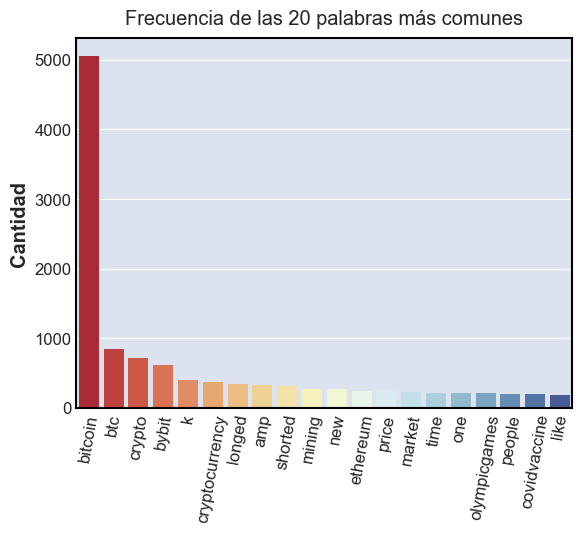

In [76]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(top_20[:, 0], y20, ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Cantidad')
ax.tick_params(axis='x', rotation=80)

In [77]:
from nltk.util import ngrams

In [78]:
text = nltk.Text(palabras_sin_stopwords)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_15456/569139366.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))


C:\Users\Jorge Monge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


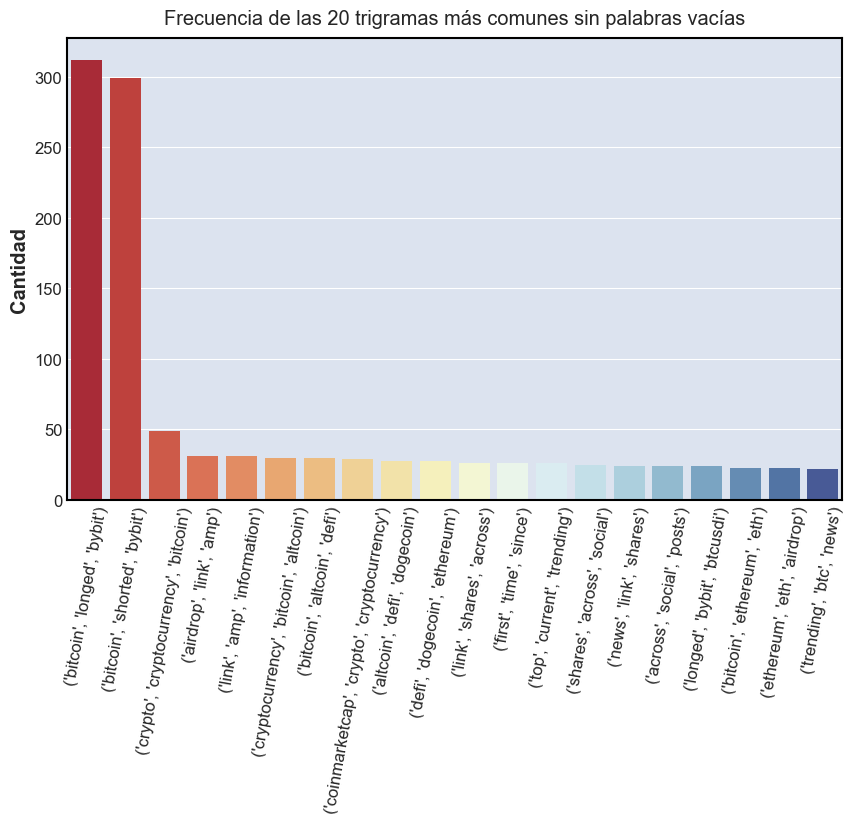

In [79]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Cantidad')
ax.tick_params(axis='x', rotation=80)

In [80]:
from wordcloud import WordCloud

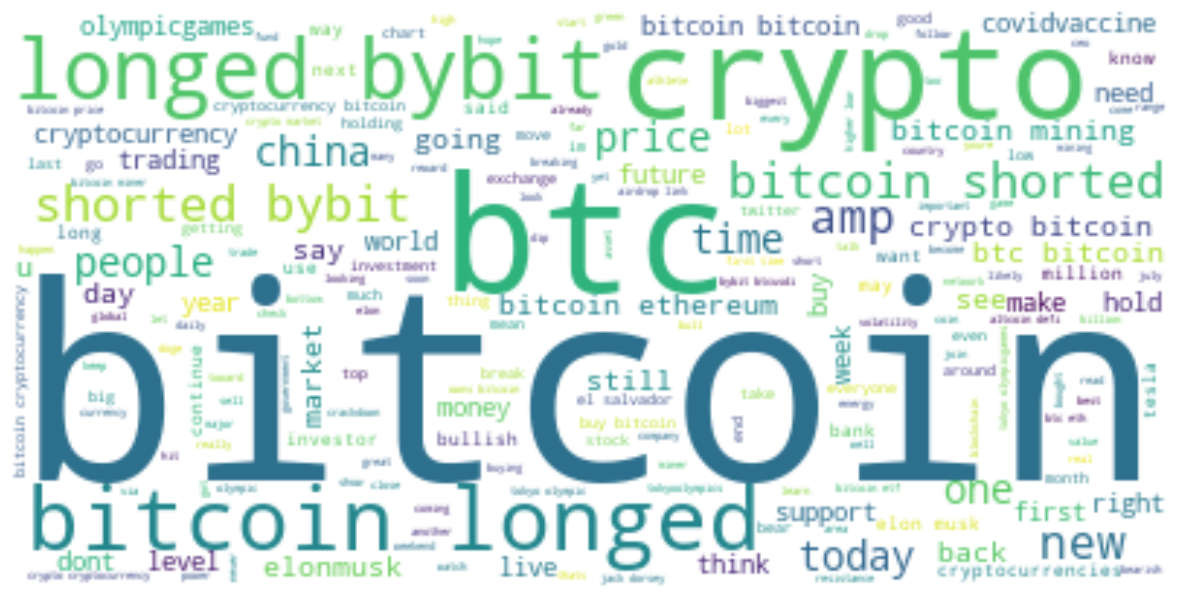

In [81]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(palabras_sin_stopwords))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()